In [ ]:
'''

2. Iris Flower Clustering
Dataset: https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Tasks
 Standardize numeric columns
 Apply K-means
 Silhouette score
 Visualize clusters
 Compare with actual species labels

'''

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df= pd.read_csv('IRIS.csv')  ## load the dataset

In [224]:
df  ## show the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [225]:
df1 = df.drop(['species'],axis=1)  ## drop the output column

In [226]:
df1  ##  show the new dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [227]:
df1.isnull().sum()    ## check null value

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()

In [230]:
df2 = scaler.fit_transform(df1)

In [231]:
df2

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [232]:
from sklearn.cluster import KMeans

In [233]:
## elbow method to find the optimal no. of clusters
error =[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df2)
    error.append(km.inertia_)
print(error)

[600.0, 223.73200573676348, 141.15417813388652, 115.19028485119944, 91.19197002146464, 82.3136862109602, 75.61947922004518, 63.18666092542264, 60.51834902749704, 52.47188748756565]


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:14

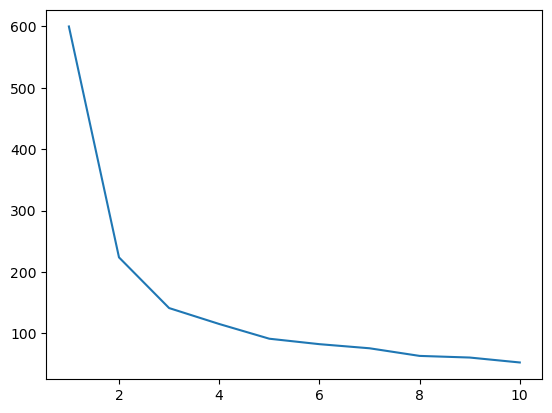

In [234]:
plt.plot(range(1,11),error)

In [235]:
km1 = KMeans(n_clusters=3)  ## use n_clusters by elbow method

In [236]:
clusters= km1.fit_predict(df2)  ## fit and predict the model 

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [237]:
print(clusters)  ## print cluster

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [238]:
km1.inertia_  ## error of the model

141.15417813388652

In [239]:
km1.cluster_centers_ 

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355]])

In [240]:
df['species'].value_counts()  ## output count from original dataset

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [241]:
(clusters==0).sum()  ## after use kmeans clustering predict the model Iris-setosa's count

50

In [242]:
(clusters==1).sum()  ## after use kmeans clustering predict the model Iris-versicolor's count

44

In [243]:
(clusters==2).sum()   ## after use kmeans clustering predict the model Iris-virginica's count

56

In [244]:
from sklearn.metrics import silhouette_score

In [245]:
## calculate silhoutte score
score = silhouette_score(df2, clusters)
print(score)

0.46214947389312017


In [246]:
## silhouette score = 0.46 means Weak to moderate structure

In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
le = LabelEncoder()

In [250]:
df['species'] = le.fit_transform(df['species'])

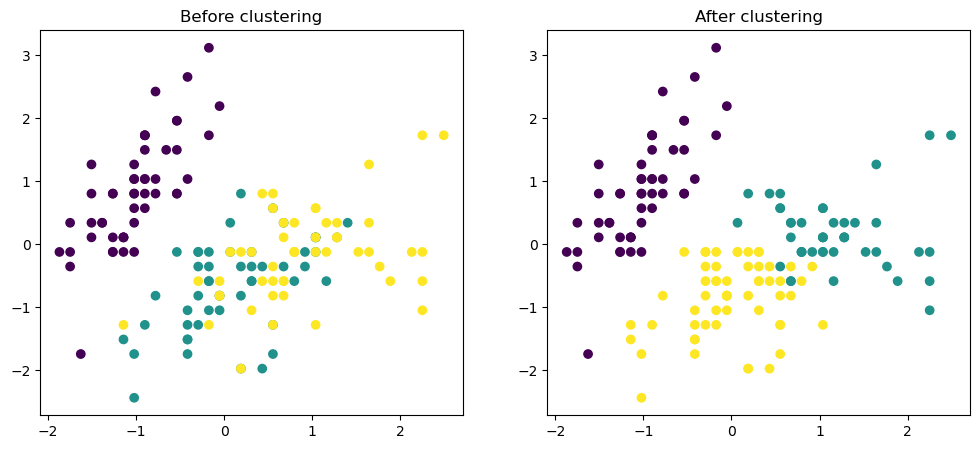

In [253]:
## show graphically dataset before clustering and after clustering

fig , (ax1,ax2)=plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title('Before clustering')
ax1.scatter(df2[:,0],df2[:,1],c=df['species'])
ax2.set_title('After clustering')
ax2.scatter(df2[:,0],df2[:,1],c=clusters)
plt.show()

In [ ]:
'''

Interpretation of this model :
       1. Data Preparation :
            i) The Species column was removed to ensure unsupervised learning, meaning the model clustered flowers without knowing actual labels.
            ii) All numerical features (sepal length, sepal width, petal length, petal width) were scaled using StandardScaler.
            iii) Scaling was necessary because K-Means relies on Euclidean distance, and unscaled features could bias clustering.
        2. Choice of Number of Clusters (k = 3) :
            i) The Elbow Method was applied to determine the optimal number of clusters.
            ii) The elbow point appeared at k = 3, indicating a good trade-off between:
                Cluster compactness
                Model simplicity
            iii) This aligns well with the natural structure of the Iris dataset, which contains three species.
        3. Model Performance Metrics:
            i) Inertia = 141.15
                -->Inertia measures the within-cluster sum of squared distances.
                -->A value of 141.15 indicates that:
                    -- Data points are reasonably close to their cluster centroids.
                    -- Clusters are compact but not perfectly tight (expected due to overlap among some iris species).
        4. Silhouette Score = 0.462
            i) The silhouette score ranges from –1 to +1.
            ii) A score of 0.462 indicates:
                Moderate cluster separation
                Clusters are meaningful but not perfectly distinct
            iii) This is expected because:
                Setosa is well separated
                Versicolor and Virginica overlap in feature space.
        5. Behavioral Interpretation of Clusters:
            i) One cluster represents flowers with short petal length and width, likely corresponding to Setosa.
            ii) The remaining two clusters capture flowers with medium and large petal dimensions, likely separating Versicolor and Virginica, though with some overlap.
            iii) This shows that K-Means successfully identified natural structure using only measurements.
        6. Strengths of the Model:
            i)Proper feature scaling improved distance calculations
            ii) Correct choice of k = 3 based on elbow method
            iii) Balanced clusters indicate stable segmentation
            iv) Silhouette score confirms reasonable cluster quality
        7. Limitations:
            i) K-Means assumes spherical clusters
            ii) Overlap between Versicolor and Virginica reduces silhouette score
            iii) K-Means does not use true species labels for optimization

'''

In [ ]:
'''

Model Conclusion :

        i) K-Means clustering effectively grouped iris flowers into three meaningful clusters.
        ii) Feature scaling ensured unbiased distance-based clustering.
        iii) The elbow method correctly identified the optimal number of clusters.
        iv) The silhouette score confirms moderate but valid cluster separation.
        v) One cluster strongly aligns with Setosa, while the others partially separate Versicolor and Virginica.
        vi) Overall, the model demonstrates that unsupervised learning can successfully uncover natural data patterns.

'''
